# IBM HR Analytics Project Exercise

## 📘 Latar Belakang
Perusahaan tempat kamu bekerja sedang mengalami tingkat turnover karyawan yang cukup tinggi. Tim Human Resources (HR) ingin memahami lebih jauh faktor-faktor yang berkontribusi terhadap tingginya angka *attrition* (resign) di antara karyawan. Mereka ingin menggunakan data yang dimiliki untuk:

1. Mengetahui pola dan perbedaan antara karyawan yang bertahan dan yang keluar.
2. Mengidentifikasi variabel-variabel penting yang memengaruhi keputusan resign.
3. Membuat kebijakan berbasis data untuk meningkatkan retensi dan kepuasan kerja.

Sebagai seorang **Data Analyst**, kamu diminta untuk melakukan analisis statistik dan eksplorasi visual dari data HR perusahaan.


## 🎯 Tujuan Exercise
Kamu akan mengerjakan beberapa studi kasus yang saling berkaitan dan mengarah pada pemahaman menyeluruh mengenai fenomena *employee attrition*. Untuk setiap studi kasus, kamu akan:

1. Menentukan metode uji statistik yang tepat.
2. Memilih jenis visualisasi yang relevan.
3. Menginterpretasikan hasil uji dan visualisasi.
4. Menyampaikan insight bisnis yang informatif dan actionable.


## 📁 Dataset
Dataset yang digunakan adalah: `IBM HR Analytics Employee Attrition & Performance`

Jika belum tersedia, kamu dapat mengunduhnya dari Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


## 🧹 Persiapan Data

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv(r"D:\0. JCDS\Module 2 - Data Analys\M2D15 - Folium\2. Practice\VizQuiz\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Unlimited scroll dataFrame
pd.set_option('display.max_columns', None)

# Cek struktur data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 🔍 Studi Kasus 1: Gaji dan Attrition
### Pertanyaan:
> Apakah terdapat perbedaan rata-rata gaji bulanan antara karyawan yang keluar (Attrition = Yes) dan yang bertahan (Attrition = No)?

### Tugas:
- Tentukan metode uji statistik yang tepat.
- Buat visualisasi yang menunjukkan perbandingan distribusi gaji antar dua grup.
- Interpretasikan hasil uji dan grafik.
- Berikan insight bisnis dari temuanmu.


In [4]:
# UJI STATISTIK

# 1. Menentukan hipotesis
# Arah uji: two tail test
H0 = "Gaji bulanan karyawan yang keluar sama dengan karyawan yang bertahan"
HA = "Gaji bulanan karyawan yang keluar tidak sama dengan karyawan yang bertahan"

# 2. Menentukan signifikansi
alpha = 0.05

# 3. Menentukan uji statistik
# Normal -> independence T-Test, Tidak Normal -> Mann Whitney

In [27]:
attrition_yes = df.query("Attrition == 'Yes'")
attrition_no = df.query("Attrition == 'No'")

***Normality Test***

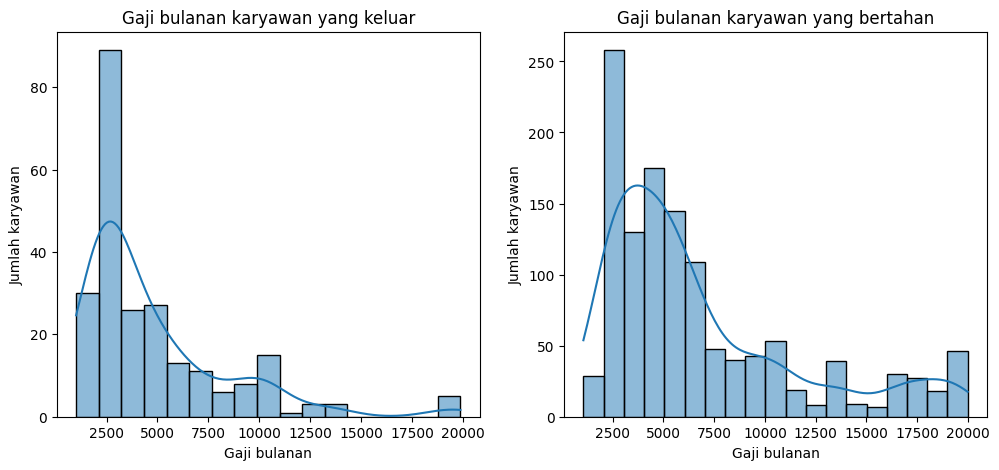

In [28]:
# secara visual

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=attrition_yes,
             x='MonthlyIncome',
             kde=True,
             ax=axes[0])
axes[0].set_title('Gaji bulanan karyawan yang keluar')
axes[0].set_xlabel('Gaji bulanan')
axes[0].set_ylabel('Jumlah karyawan')

sns.histplot(data=attrition_no,
             x='MonthlyIncome',
             kde=True,
             ax=axes[1])
axes[1].set_title('Gaji bulanan karyawan yang bertahan')
axes[1].set_xlabel('Gaji bulanan')
axes[1].set_ylabel('Jumlah karyawan')

plt.show()

In [31]:
# secara statistik

from scipy.stats import shapiro

# hipotesis
ho_normal = "Distribusi normal"
ha_normal = "Tidak terdistribusi normal"

test_attrition_yes = shapiro(attrition_yes['MonthlyIncome'])
test_attrition_no = shapiro(attrition_no['MonthlyIncome'])

pval_yes = test_attrition_yes[1]
pval_no = test_attrition_no[1]

print("Test Result attritition yes: ", pval_yes)
print("Test Result attrition no: ", pval_no)

def draw_conclusion(pval, ho, ha, alpha=0.05):
    if pval < alpha:
        print(f"Karena nilai p-value ({round(pval, 3)}) < alpha, maka", ha)
    else:
        print(f"Karena nilai p-value ({round(pval, 3)}) > alpha, maka", ho)

Test Result attritition yes:  1.5025414983521328e-17
Test Result attrition no:  5.9703792392981e-34


In [33]:
# attrition_yes
draw_conclusion(pval_yes, ho_normal, ha_normal)

Karena nilai p-value (0.0) < alpha, maka Tidak terdistribusi normal


In [35]:
# attrition_no
draw_conclusion(pval_no, ho_normal, ha_normal)

Karena nilai p-value (0.0) < alpha, maka Tidak terdistribusi normal


***Hypothesis Test***

In [36]:
from scipy.stats import mannwhitneyu

test_result = mannwhitneyu(attrition_yes['MonthlyIncome'], attrition_no['MonthlyIncome'])
pval = test_result[1]

draw_conclusion(pval, H0, HA)

Karena nilai p-value (0.0) < alpha, maka Gaji bulanan karyawan yang keluar tidak sama dengan karyawan yang bertahan


***Insight***
- Gaji karyawan yang keluar dengan yang bertahan tidaklah sama. jika melihat ke grafik distribusi diatas, gaji karyawan yang bertahan cenderung lebih tinggi
- Kemungkinan, perbedaan gaji ini lah yang membuat karyawan keluar dari company (undervalued)

## 🔍 Studi Kasus 2: Gender dan Resign
### Pertanyaan:
> Apakah gender memiliki pengaruh terhadap kemungkinan resign?

### Tugas:
- Tentukan metode uji statistik yang sesuai.
- Buat visualisasi proporsi attrition berdasarkan gender.
- Interpretasi dan insight yang bisa disampaikan.


In [ ]:
# UJI STATISTIK

# 1. Menentukan hipotesis
# Arah uji: two tail test
H0 = "Gender memiliki pengaruh terhadap kemungkinan resign"
HA = "Gender tidak memiliki pengaruh terhadap kemungkinan resign"

# 2. Menentukan signifikansi
alpha = 0.05

# 3. Menentukan uji statistik: chi-square test

In [52]:
gender_attrition = pd.crosstab(df['Attrition'], df['Gender'])

from scipy.stats import chi2_contingency

test_result = chi2_contingency(gender_attrition)
pval = test_result[1]

draw_conclusion(pval, H0, HA)

Karena nilai p-value (0.291) > alpha, maka Gender memiliki pengaruh terhadap kemungkinan resign


<Axes: xlabel='Attrition'>

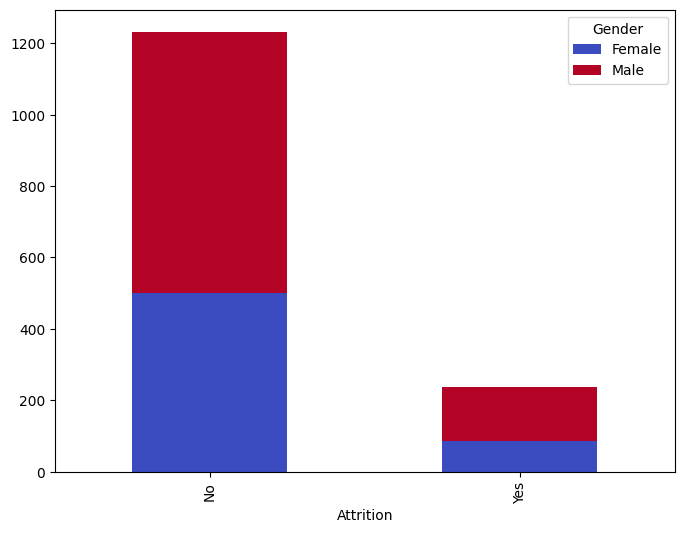

In [56]:
gender_attrition.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    colormap='coolwarm'
)

In [72]:
fig = px.bar(gender_attrition, barmode='stack',
             title='Perbandingan Attrition Karyawan Laki-laki dan Perempuan',
             height=600, width=400)
fig.update_layout(
    xaxis_title = 'Attrition',
    yaxis_title = 'Jumlah Karyawann')
fig.show()

***Insight***

- berdasarkan uji statistik, perbedaan gender memilki kemungkinan resign
- juga dilihat dari grafik diatas, bahwa Male lebih banyak yang resign dibanding Female

## 🔍 Studi Kasus 3: Job Satisfaction Antar Departemen
### Pertanyaan:
> Apakah terdapat perbedaan tingkat kepuasan kerja antar departemen?

### Tugas:
- Tentukan uji statistik yang digunakan.
- Buat grafik yang membandingkan distribusi JobSatisfaction antar Department.
- Interpretasi hasil uji dan insight yang relevan.


In [101]:
df.value_counts('Department')

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [103]:
# UJI STATISTIK

# 1. Menentukan hipotesis
# Arah uji: two tail test
H0 = "terdapat perbedaan tingkat kepuasan kerja antar department"
HA = "tidak terdapat perbedaan tingkat kepuasan kerja antar department"

# 2. Menentukan signifikansi
alpha = 0.05

# 3. Menentukan uji statistik: 
# Normal -> Independence T-Test, Tidak Normal -> Mann Withney

In [106]:
Sales = df.query("Department == 'Sales'")['JobSatisfaction']
RnD = df.query("Department == 'Research & Development'")['JobSatisfaction']
HR = df.query("Department == 'Human Resources'")['JobSatisfaction']

***Normality Test***

In [108]:
# hipotesis
ho_normal = "Distribusi normal"
ha_normal = "Tidak terdistribusi normal"

test_sales = shapiro(Sales)
test_rnd = shapiro(RnD)
test_hr = shapiro(HR)

pval_sales = test_sales[1]
pval_rnd = test_rnd[1]
pval_hr = test_hr[1]

print("Test Result sales: ", pval_sales)
print("Test Result RnD: ", pval_rnd)
print("Test Result HR: ", pval_hr)

Test Result sales:  9.969654662742214e-21
Test Result RnD:  1.2563073983562737e-29
Test Result HR:  4.902771707856244e-06


In [109]:
# Sales
draw_conclusion(pval_sales, ha_normal, ha_normal)

Karena nilai p-value (0.0) < alpha, maka Tidak terdistribusi normal


In [111]:
# RnD
draw_conclusion(pval_rnd, ha_normal, ha_normal)

Karena nilai p-value (0.0) < alpha, maka Tidak terdistribusi normal


In [113]:
# HR
draw_conclusion(pval_hr, ha_normal, ha_normal)

Karena nilai p-value (0.0) < alpha, maka Tidak terdistribusi normal


***Hyphotesis Test***

In [116]:
from scipy.stats import mannwhitneyu

test_result = mannwhitneyu(Sales, RnD, HR)
pval = test_result[1]

draw_conclusion(pval, H0, HA)

TypeError: unhashable type: 'Series'

## 🔍 Studi Kasus 4: Jarak Rumah dan Attrition
### Pertanyaan:
> Apakah terdapat hubungan antara jarak dari rumah ke kantor dan kemungkinan resign?

### Tugas:
- Pilih metode korelasi yang tepat.
- Buat scatter plot antara DistanceFromHome dan Attrition.
- Interpretasi kekuatan dan arah hubungan.
- Insight operasional dari temuan.


## 🔍 Studi Kasus 5: Visualisasi Korelasi
### Pertanyaan:
> Faktor apa saja yang paling berkaitan dengan attrition?

### Tugas:
- Buat visualisasi heatmap korelasi antar variabel numerik.
- Interpretasikan korelasi dengan attrition (ubah menjadi 0/1 jika perlu).
- Buat insight menyeluruh untuk manajemen HR.


## 🧠 Ringkasan Akhir
Tuliskan ringkasan insight dan rekomendasi strategis untuk HR berdasarkan seluruh hasil analisis. Susun dalam bentuk executive summary maksimal 1 halaman.

> 📌 *Catatan: Kerjakan setiap studi kasus dalam urutan yang diberikan. Fokus pada metode, interpretasi, dan insight yang bisa dikaitkan dengan konteks bisnis.*
